# EE301A Assignment 1
- Use python3
- Submit your "rendered" ipynb, i.e., with outputs of codes (plots and printed values) visible below
- Use only numpy library for computing and signal processing, no other package allowed

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1. Downsampling

Generate a triangle wave with time period = T seconds, sampling rate Fs, and length N. Its amplitude should vary between 0 and 1, and both rising and falling should have same slopes (magnitude).
NOTE: signal should start from zero amplitude.(i.e. rising edge should occur first)

In [2]:
def generateTriangle(T, Fs, N):
    '''
    Return: 
        x: numpy array of shape (N,)
    '''

    ### WRITE YOUR CODE HERE - 5 MARKS
    j=0
    x=np.zeros(N)
    for i in range(N):
      t = i/Fs - j*T
      if(t >= T):
        t = t - T
        j+=1

      if(t < T/2):
          x[i] = (2*t)/T
      else:
          x[i] = ((-2*t)/T) + 2

    return x

Downsample x by a factor M (positive integer)

In [3]:
def downsample(x, M):
    '''
    Return:
        y: numpy array of shape similar to x, but shorter by a factor M
    '''

    ### WRITE YOUR CODE HERE - 5 MARKS
    y = np.array([x[0]])
    i=1
    while(i*M<x.size):
      y = np.append(y, x[i*M])
      i = i+1

    return y

Plot x vs n

In [4]:
def plot_discrete(x, xlabel='',ylabel=''):
    plt.stem(np.arange(0,len(x)),x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return

Plot x vs t, using sampling rate Fs

In [5]:
def plot_continuous(x, Fs, xlabel='',ylabel=''):
    Ts=1/Fs
    N = len(x)
    duration_in_s = N*Ts
    plt.plot(np.arange(0,duration_in_s,Ts), x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return

### Experiment (use the above functions only)
- Consider a signal $x(t)$ which is a triangle wave with time period 0.1s and of total duration of 10 seconds. Sample it at Fs=100Hz. Plot $x(t)$ and $x[n]$. 
- Downsample $x[n]$ by a factor of 2 to get $y[n]$. Plot $y(t)$ and $y[n]$. 
- What is the time period of $y(t)$? (compute manually)

Grading: 10 marks for correct plots and correct value of time period

time period of yt 0.05s


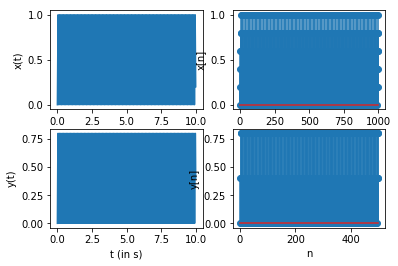

In [6]:
def expt1():
    

    ### WRITE YOUR CODE HERE - 10 MARKS
    T=0.1
    Fs=100
    t=10
    f=2
    N=int(t*Fs)
    xt = xn = generateTriangle(T, Fs, N)
    yt = yn = downsample(xn, f)

    ### (the variables you get here will be plotted/printed by lines below)
    T_yt = '0.05s'
    plt.subplot(221);plot_continuous(xt, Fs, xlabel='t (in s)', ylabel='x(t)');
    plt.subplot(222);plot_discrete(xn, xlabel='n', ylabel='x[n]');
    plt.subplot(223);plot_continuous(yt, Fs/f, xlabel='t (in s)', ylabel='y(t)');
    plt.subplot(224);plot_discrete(yn, xlabel='n', ylabel='y[n]');
    print('time period of yt', T_yt)
    return
if __name__=="__main__":
    expt1()

# Q2. Moving Average Filter

Generate a sine signal x[n] with frequency f Hz, sampled at Fs Hz, and length N

In [7]:
def generateSine(f, Fs, N):
    '''
    Return: 
        x: numpy array of shape (N,)
    '''

    ### WRITE YOUR CODE HERE - 5 MARKS
    x=np.zeros(N)
    for i in range(1,N):
      x[i] = np.sin(2*np.pi*i*f/Fs)

    return x

Build a moving average filter of length M. It should be causal. Assume x=0 for n<0;
use same formula as discussed in class.

In [8]:
def filter_MA(x, M):
    '''
    Return:
        y: numpy array of shape similar to x
    '''

    ### WRITE YOUR CODE HERE - 5 MARKS
    y=np.zeros(x.size)
    for i in range(0,x.size):
      for j in range(0,M):
        if(i>=j):
          y[i] += x[i-j]
      y[i] = y[i]/M

    return y

Generate Gaussian noise signal with g[n] ~ $\mathcal{N}(\mu, \sigma)$ of length N 

In [9]:
def noiseGenerator(mu, sigma, N):
    '''
    Return: 
        g: numpy array of shape (N,)
    '''

    ### WRITE YOUR CODE HERE - 3 MARKS
    g = np.random.normal(mu, sigma, N)

    return g

Adder: adds two signal x and g

In [10]:
def adder(x, g):
    '''
    Return:
        y: numpy array with y[n]=x[n]+g[n]
    '''

    ### WRITE YOUR CODE HERE - 2 MARKS
    y = x+g

    return y

### Experiment (use the above functions only)
- Construct a signal $x(t)$ with frequency 10 Hz of duration 0.5s. Sample it at 100Hz to get $x[n]$. Plot $x[n]$
- Generate random noise $g[n] ~ \mathcal{N}(0,0.3)$. Plot $g[n]$
- Add noise to the signal. Plot the mixture $y[n]$
- Pass y[n] through a moving average filter with M=4. Plot its output $z[n]$. Note that it looks more like $x[n]$, i.e. clean signal.

Grading: 10 marks for correct plots

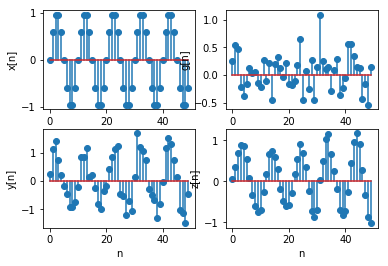

In [11]:
def expt2():

    ### WRITE YOUR CODE HERE - 10 MARKS
    f=10
    t=0.5
    Fs=100
    N=int(t*Fs)
    xn = generateSine(f,Fs,N)
    gn = noiseGenerator(0,0.3,N)
    yn=adder(xn,gn)
    zn=filter_MA(yn,4)
    
    ### WRITE YOUR CODE HERE (the variables you get here will be plotted/printed by lines below)
    
    plt.subplot(221);plot_discrete(xn, xlabel='n', ylabel='x[n]')
    plt.subplot(222);plot_discrete(gn, xlabel='n', ylabel='g[n]')
    plt.subplot(223);plot_discrete(yn, xlabel='n', ylabel='y[n]')
    plt.subplot(224);plot_discrete(zn, xlabel='n', ylabel='z[n]')
    return
if __name__=="__main__":
    expt2()

# Q3. Frequency Estimation

Generate a frequency modulated signal x[n], which is $x(t)=\sin(2\pi f(t)t)$ with $f(t)=f_1+0.1\sin(2\pi f_2 t)$, sampled at a rate Fs and of length N.

In [12]:
def generate_FM(f1, f2, Fs, N):
    '''
    Return: 
        x: numpy array of shape (N,)
    '''

    ### WRITE YOUR CODE HERE - 5 MARKS\
    x = np.zeros(N)
    for i in range(0,N):
      x[i] = np.sin(2*np.pi*(f1 + 0.1*np.sin(2*np.pi*f2*i/Fs))*i/Fs)

    return x

Extract window: Given a signal x[n], take small windows of size W seconds with a hop or shift of H seconds. Use Fs as sampling rate. Return i'th window

In [13]:
def extractWindow(x, W, H, Fs, i):
    '''
    Return: 
        xw: numpy array of shape similar to x, but truncated
    '''

    ### WRITE YOUR CODE HERE - 5 MARKS
    WN = int(W*Fs)
    xw = np.zeros(WN)
    # xw = np.zeros(x.size)
    for index in range(0,WN):
      xw[index] = x[index + i*int(H*Fs)]

    return xw

Estimate the fundamental frequency F0 of x[n] in Hz, taking the sampling rate as Fs.
1. Use autocorrelation function
2. Use difference function

In [14]:
def estimateF0_autocorr(x, Fs):

    ### WRITE YOUR CODE HERE - 10 MARKS
    N = x.size
    F0_Hz=0
    rxx = np.zeros(N)
    for i in range(0,N):
      for j in range(i,N):
        rxx[i] += x[j]*x[j-i]
      rxx[i] = rxx[i]/(N-i)
    for i in range(1,N-1):
      if(rxx[i]>rxx[i-1] and rxx[i]>rxx[i+1]):
        F0_Hz = i
        break
    F0_Hz = F0_Hz/Fs
    
    return F0_Hz

In [15]:
def estimateF0_diff(x, Fs):

    ### WRITE YOUR CODE HERE - 10 MARKS
    N = x.size
    F0_Hz=0
    rxx = np.zeros(N)
    for i in range(0,N):
      for j in range(i,N):
        rxx[i] += (x[j] - x[j-i])*(x[j] - x[j-i])
    for i in range(1,N-1):
      if(rxx[i]<rxx[i-1] and rxx[i]<rxx[i+1]):
        F0_Hz = i
        break
    F0_Hz = F0_Hz/Fs

    return F0_Hz

### Experiment (use the above defined functions only)
- Generate an FM signal with f1=1Hz and f2=0.1Hz. Use Fs=20Hz for duration of 5 secs. Plot $x[n]$
- $x[n]$ is a quasi-stationary signal. Take small windows with W=2s and H=1s. Estimate F0 for each window using autocorrelation function. Plot F0_autocorr vs t.
- Repeat F0 estimation using difference function. Plot F0_diff vs t.

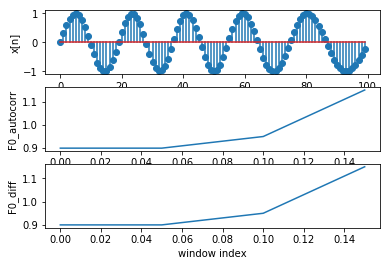

In [16]:
def expt3():

    ### WRITE YOUR CODE HERE - 10 MARKS
    f1=1
    f2=0.1
    Fs=20
    t=5
    N=int(Fs*t)
    xn = generate_FM(f1, f2, Fs, N)
    i=0
    W=2
    H=1
    F0_autocorr = []
    F0_diff = []
    while((i*H + W)*Fs <= N):
      w = extractWindow(xn, W, H, Fs, i)
      F0_autocorr.append(estimateF0_autocorr(w, Fs))
      F0_diff.append(estimateF0_diff(w, Fs))
      i = i+1
    F0_autocorr = np.array(F0_autocorr)
    F0_diff = np.array(F0_diff)
    
    ### WRITE YOUR CODE HERE (the variables you get here will be plotted/printed by lines below)
    plt.subplot(311);plot_discrete(xn, xlabel='n', ylabel='x[n]');
    plt.subplot(312);plot_continuous(F0_autocorr, Fs, xlabel='window index',ylabel='F0_autocorr');
    plt.subplot(313);plot_continuous(F0_diff, Fs, xlabel='window index',ylabel='F0_diff');
    return
if __name__=="__main__":
    expt3()